  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
ERP           0
dtype: int64


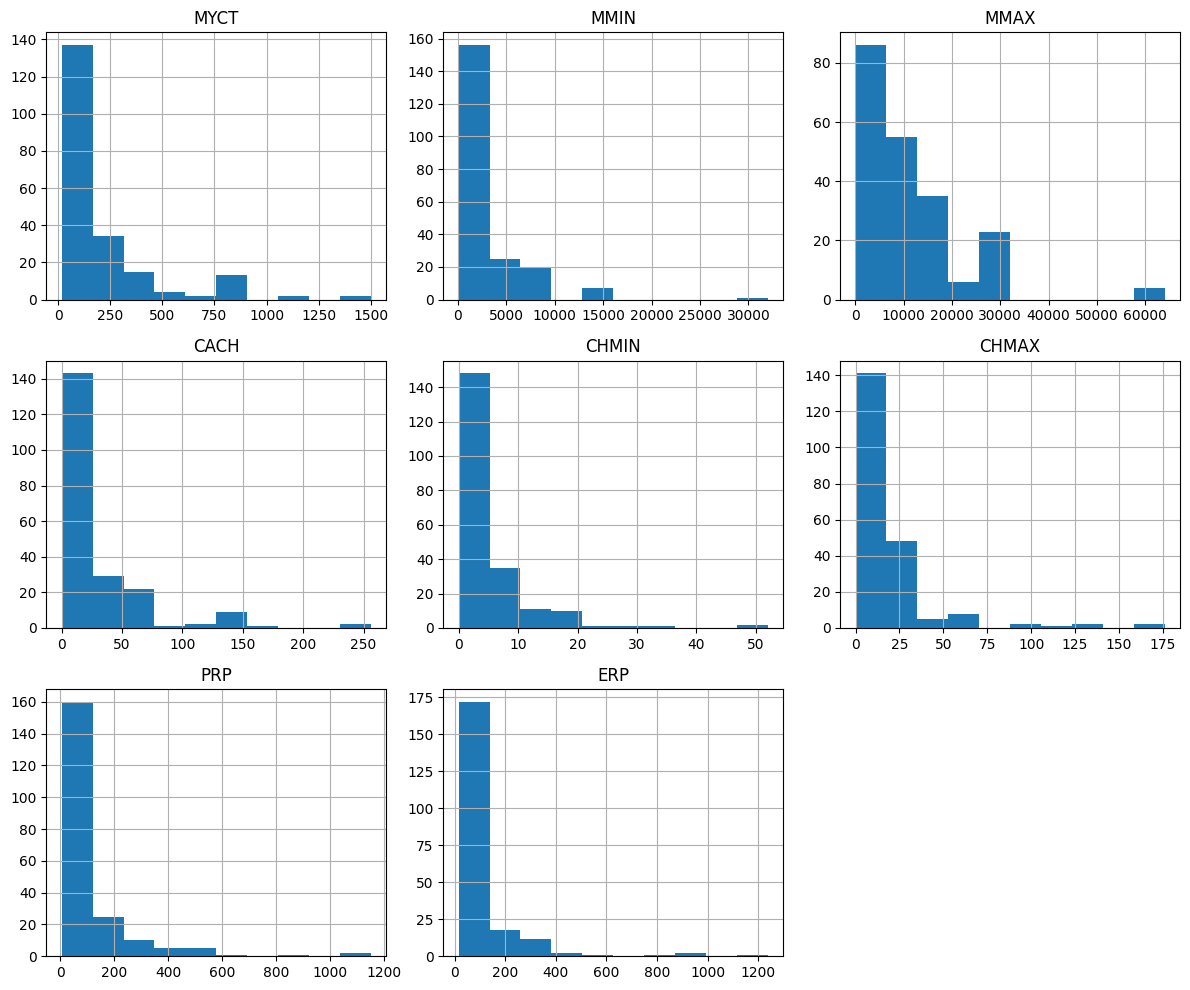

Mean Squared Error (Train): 1529.020470551296
Mean Squared Error (Test): 2370.096374775837
Mean Absolute Error (Train): 23.23225578463932
Mean Absolute Error (Test): 31.4062186755356
R² (Train): 0.9204648044109383
R² (Test): 0.9534424890368542
Cross Validation R² Scores: [0.85060539 0.75851864 0.80002955 0.89072312 0.9400806 ]
Cross Validation MSE Scores: [6970.97330196 1111.59466615 2311.04617947 2173.84482452  489.7198621 ]
Cross Validation MAE Scores: [44.75801683 16.04426979 31.00779159 29.51929301 16.26892571]
Average R² (CV): 0.8479914615575094
Average MSE (CV): 2611.435766839486
Average MAE (CV): 27.519659384521837


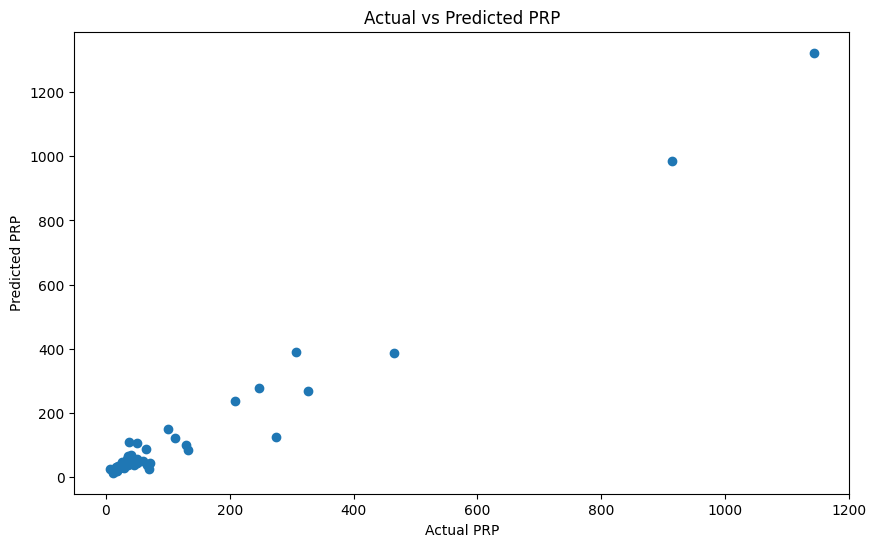

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("machine.data_update.csv")

print(data.head())

print(data.isnull().sum())

data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

X = data.drop(columns=['PRP','VendorName','ModelName'])
y = data['PRP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
cv_scores_mse = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_mae = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

cv_mean_r2 = np.mean(cv_scores_r2)
cv_mean_mse = np.mean(cv_scores_mse)
cv_mean_mae = np.mean(cv_scores_mae)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)
print("Mean Absolute Error (Train):", mae_train)
print("Mean Absolute Error (Test):", mae_test)
print("R² (Train):", r2_train)
print("R² (Test):", r2_test)
print("Cross Validation R² Scores:", cv_scores_r2)
print("Cross Validation MSE Scores:", cv_scores_mse)
print("Cross Validation MAE Scores:", cv_scores_mae)
print("Average R² (CV):", cv_mean_r2)
print("Average MSE (CV):", cv_mean_mse)
print("Average MAE (CV):", cv_mean_mae)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual PRP")
plt.ylabel("Predicted PRP")
plt.title("Actual vs Predicted PRP")
plt.show()